# Question 1

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

In [222]:
X = np.genfromtxt("complex_distribution.csv")
print(X.shape)

np.random.seed(42) # for reproducibility/consistency

(10001,)


__Part 1: Getting p(x)__

In [223]:
# get p(x) with kde
kde = gaussian_kde(X, bw_method=0.1)
X_min = min(X)
X_max = max(X)

def p(x):
    return kde.evaluate(x)

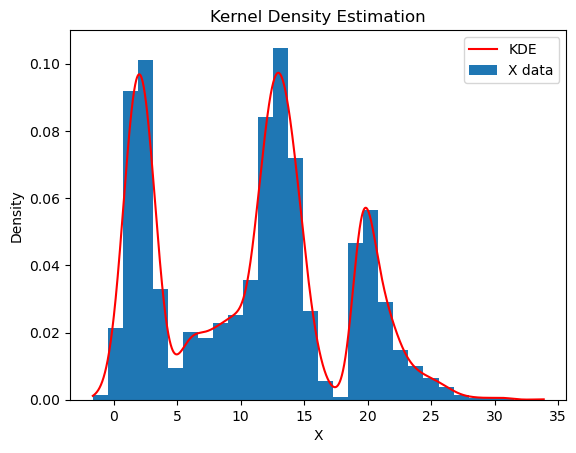

In [224]:
# plotting p(x) against X (the complex distribution)
x_plot = np.linspace(X_min, X_max, 10000)

plt.plot(x_plot, p(x_plot), color='r', label="KDE")
plt.hist(X, bins=30, density=True, label="X data")
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')
plt.legend()
plt.show()

__Part 2__

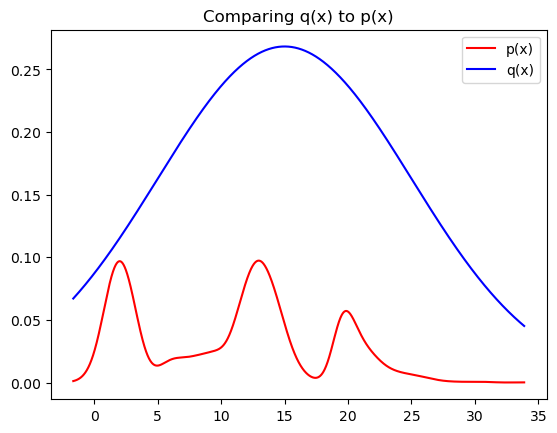

In [225]:
# getting X_hat
n = 10000

# I chose to use a normal distribution
def q(x):
    return norm.pdf(x, loc=15, scale=10) # mean of 15, std of 10

# finding k
x = np.linspace(X_min, X_max, n)
k = max(p(x) / q(x)) + 1

plt.plot(x, p(x), color="r", label="p(x)")
plt.plot(x, k * q(x), color="b", label="q(x)")
plt.title("Comparing q(x) to p(x)")
plt.legend()
plt.show()

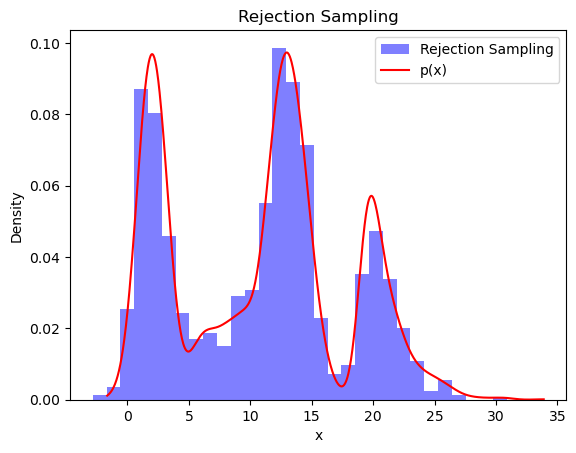

In [226]:
# getting samples u from q(x) and v from uniform dist
u = np.random.normal(15, 10, size=n)
v = np.random.uniform(0, 1, size=n)

X_hat = u[p(u) / (k * q(u)) > v] # masking to reject samples

# plotting the rejection samples
plt.hist(X_hat, bins=30, density=True, alpha=0.5, color='b', label='Rejection Sampling')
x_plot = np.linspace(X_min, X_max, 1000)
plt.plot(x_plot, p(x_plot), color='r', label='p(x)')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling')
plt.legend()
plt.show()

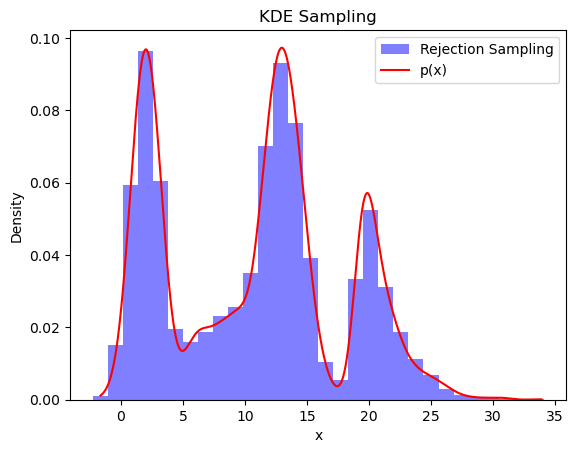

In [227]:
# getting X_bar
n = 10000

# using kde sampling
X_bar = kde.resample(n).reshape((10000,))

# plotting kde samples
plt.hist(X_bar, bins=30, density=True, alpha=0.5, color='b', label='Rejection Sampling')
x_plot = np.linspace(X_min, X_max, 1000)
plt.plot(x_plot, p(x_plot), color='r', label='p(x)')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('KDE Sampling')
plt.legend()
plt.show()

__Part 3__

In [228]:
def get_stats(x):
    # part a
    expected_value = np.mean(x)
    # part b
    variance = np.var(x)
    # part c
    ev_1 = np.mean(3*x + 2)
    ev_2 = np.mean(x**2 - 5*x)
    ev_3 = np.mean(2*np.exp(x) + 1)

    print(f"expected value: {expected_value}")
    print(f"variance: {variance}")
    print(f"expected value: {ev_1}")
    print(f"expected value: {ev_2}")
    print(f"expected value: {ev_3}")

# stats for original samples
get_stats(X)

expected value: 10.814000119911924
variance: 49.40961360042826
expected value: 34.44200035973577
expected value: 112.28221159432371
expected value: 258969297984.54385


__Part 4__

In [229]:
# stats for rejection sampling
get_stats(X_hat)

expected value: 10.670007957462314
variance: 47.9953886744599
expected value: 34.01002387238694
expected value: 108.49441869945743
expected value: 40611513217.6451


__Part 5__

In [230]:
# stats for KDE sampling
get_stats(X_bar)

expected value: 10.738577664606263
variance: 50.07910082178956
expected value: 34.21573299381878
expected value: 111.70326275753872
expected value: 191082871305.8055


# Question 2

In [231]:
def f(x):
    return np.log(x + 1)

n = 10000
samples = f(np.random.sample(n) * 2) #sample only gives floats in [0, 1), so we multiply by 2 to get values between 0 and 2

# should be approximately 1.29
approx = 2 * np.mean(samples)
print(f'Integral approximation: {approx}')

Integral approximation: 1.295580021832146


# Question 3

In [232]:
def f(x):
    return x**2 - x + 1

n = 10000
samples = f(np.random.sample(n))

# should be approximately 5/6
approx = np.mean(samples)
print(f'Integral approximation: {approx}')

Integral approximation: 0.8332680259536123
